# 1. Info

The main purpose of this notebook is to prepare the data and make the EDA to the data. 

Before running this notebook, ensure the file **Hotel_Reservations.csv** is inside the folder **data** to ensure the correct functionality.

# 2. Transform the data

## 2.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Read the data

In [2]:
data = pd.read_csv("../data/Hotel_Reservations.csv")

## 2.3. Quick peek

In [3]:
data.shape

(36275, 19)

In [4]:
data.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset contains 3 caterical features, 1 primary key, and 14 numerical features. 
* There are no null values which is great because all the data is complete.

## 2.4 Categorical variable

In [6]:
categorical = ['type_of_meal_plan','room_type_reserved','market_segment_type']

In [7]:
for categorical_col in categorical:
    print(f"{categorical_col} : {len(data[categorical_col].unique().tolist())}")
    print(f"{data[categorical_col].unique().tolist()}")

type_of_meal_plan : 4
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
room_type_reserved : 7
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
market_segment_type : 5
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']


In [8]:
type_of_meal_plan_index = [value for value in range(0,len(data['type_of_meal_plan'].unique().tolist()))]
room_type_reserved_index = [value for value in range(0,len(data['room_type_reserved'].unique().tolist()))]
market_segment_type_index = [value for value in range(0,len(data['market_segment_type'].unique().tolist()))]

In [9]:
type_of_meal_plan_dict = dict(zip(data['type_of_meal_plan'].unique().tolist(),type_of_meal_plan_index))
room_type_reserved_dict = dict(zip(data['room_type_reserved'].unique().tolist(),room_type_reserved_index))
market_segment_type_dict = dict(zip(data['market_segment_type'].unique().tolist(),market_segment_type_index))

In [10]:
data['type_of_meal_plan'] = data['type_of_meal_plan'].replace(type_of_meal_plan_dict)
data['room_type_reserved'] = data['room_type_reserved'].replace(room_type_reserved_dict)
data['market_segment_type'] = data['market_segment_type'].replace(market_segment_type_dict)
data['booking_status'] = data['booking_status'].replace({'Not_Canceled':0,'Canceled':1})

## 2.5 save data into a csv

Since the data already has been processed, the current format will be save into a csv file.

In [11]:
data.to_csv('../data/Hotel_Cancelations.csv', index=False)

## 2.6 Dictionaries for future references

In [12]:
type_of_meal_plan_dict

{'Meal Plan 1': 0, 'Not Selected': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}

In [13]:
room_type_reserved_dict

{'Room_Type 1': 0,
 'Room_Type 4': 1,
 'Room_Type 2': 2,
 'Room_Type 6': 3,
 'Room_Type 5': 4,
 'Room_Type 7': 5,
 'Room_Type 3': 6}

In [14]:
market_segment_type_dict

{'Offline': 0, 'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}

In [15]:
{'Not_Canceled':0,'Canceled':1}

{'Not_Canceled': 0, 'Canceled': 1}

# 3. EDA

In [16]:
data.query("no_of_adults == 0")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,0,0,2,56,2018,12,7,1,0,0,0,82.44,1,0
287,INN00288,0,2,2,2,0,0,0,68,2018,4,24,1,0,0,0,108.38,1,1
653,INN00654,0,2,1,2,0,0,2,78,2018,8,19,1,0,0,0,115.68,1,0
937,INN00938,0,2,0,3,0,0,2,40,2018,1,14,1,0,0,0,6.67,1,0
954,INN00955,0,2,1,1,0,0,2,92,2018,10,29,1,0,0,0,81.50,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,0,0,2,76,2018,9,21,1,0,0,0,127.38,3,0
34730,INN34731,0,2,1,1,0,0,2,178,2018,8,27,1,0,0,0,88.77,0,1
34890,INN34891,0,2,2,2,0,0,2,31,2018,9,16,1,0,0,0,124.25,2,0
35691,INN35692,0,2,2,1,0,0,2,75,2018,3,19,1,0,0,0,78.00,0,1


In [17]:
data[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_year','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,2017.820427,7.423653,15.596995,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.383836,3.069894,8.740447,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000


The maximun number of adults is 4 and number of children is 10, and the mean is close to 1.

The maximun number of weekend nights is 7, and the maximum number of week nights is 17, but the means is really close to 1 and 2.

The maximum lead time is 443, which means it was reserved with more than one year, and the medium lead time is 57.



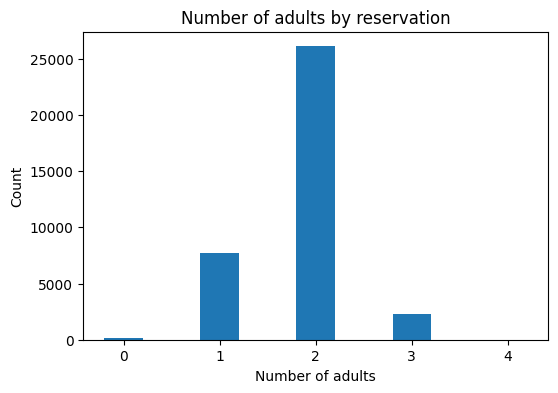

In [18]:
no_adults = data['no_of_adults'].value_counts().reset_index()

fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(no_adults['no_of_adults'], no_adults['count'], width = 0.4)
 
plt.xlabel("Number of adults")
plt.ylabel("Count")
plt.title("Number of adults by reservation")
plt.show()

Usually the number of adults who are in a reservation is 2.

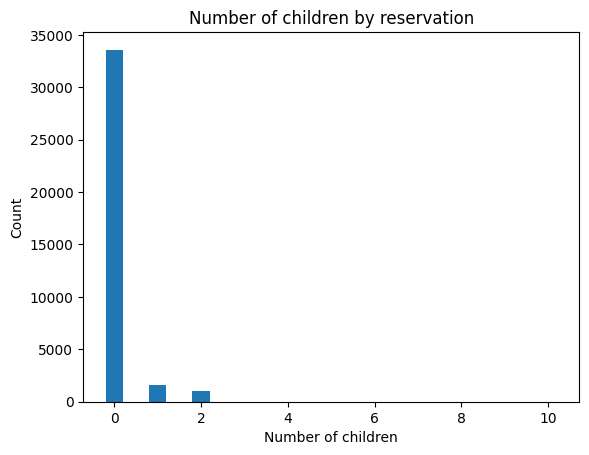

In [19]:
no_children = data['no_of_children'].value_counts().reset_index()

# creating the bar plot
plt.bar(no_children['no_of_children'], no_children['count'], width = 0.4)
 
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.title("Number of children by reservation")
plt.show()

Most of the people who reserved hotel rooms did it with no childrens.

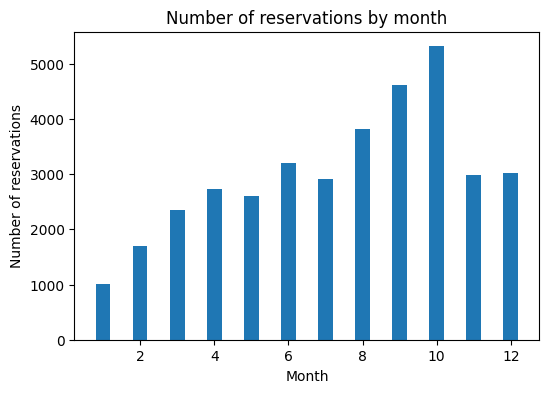

In [20]:
arrival_month = data['arrival_month'].value_counts().reset_index()

fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(arrival_month['arrival_month'], arrival_month['count'], width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Number of reservations")
plt.title("Number of reservations by month")
plt.show()

The month were most hotel rooms were reserve is october and the month with less reservations is january.

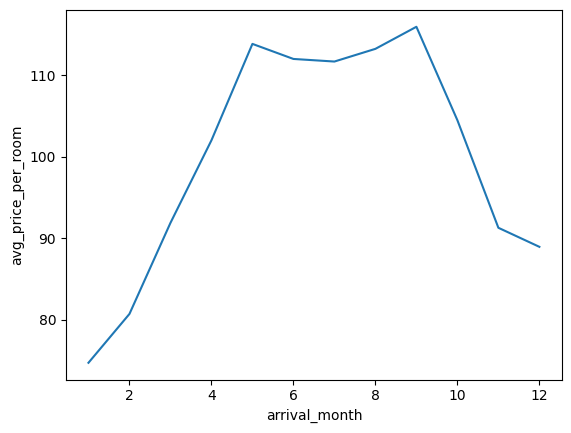

In [21]:
price_by_month = data.groupby('arrival_month')['avg_price_per_room'].mean().reset_index()
sns.lineplot(data=price_by_month, x="arrival_month", y="avg_price_per_room");

Between May and November the prices are higher than the rest of the month.

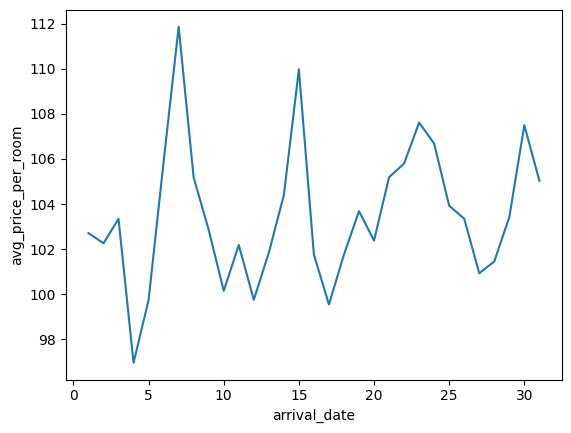

In [22]:
price_by_day = data.groupby('arrival_date')['avg_price_per_room'].mean().reset_index()
sns.lineplot(data=price_by_day, x="arrival_date", y="avg_price_per_room");

Prices go high around every 7 days and then go down again, which could mean the prices go high every weekend.

In [23]:
cancelations_by_month = data.groupby(['arrival_month','booking_status']).count().reset_index()[['arrival_month','booking_status','no_of_adults']].rename(columns={'no_of_adults':'no_reservations'})

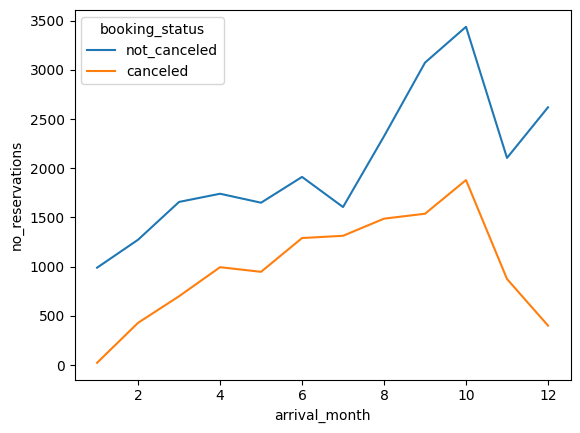

In [24]:
cancelations_by_month['booking_status'] = cancelations_by_month['booking_status'].replace({0:'not_canceled',1:'canceled'})
sns.lineplot(data=cancelations_by_month, x="arrival_month", y="no_reservations", hue="booking_status");

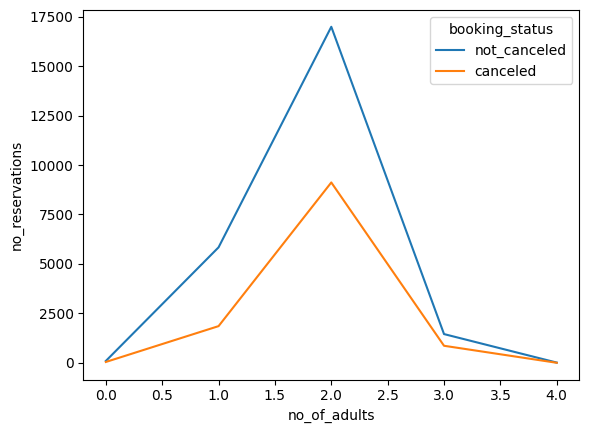

In [25]:
cancelations_by_month = data.groupby(['no_of_adults','booking_status']).count().reset_index()[['no_of_adults','booking_status','arrival_month']].rename(columns={'arrival_month':'no_reservations'})

cancelations_by_month['booking_status'] = cancelations_by_month['booking_status'].replace({0:'not_canceled',1:'canceled'})
sns.lineplot(data=cancelations_by_month, x="no_of_adults", y="no_reservations", hue="booking_status");

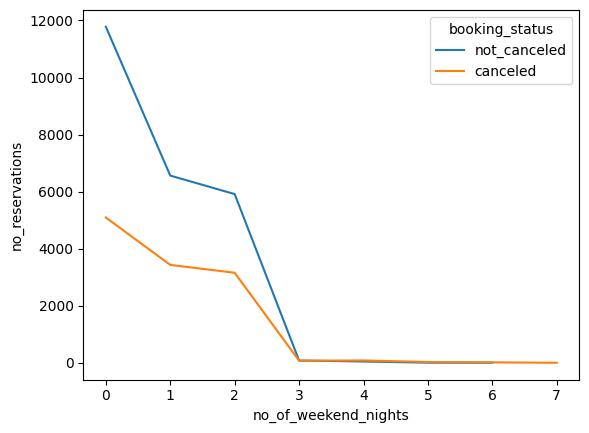

In [26]:
cancelations_by_month = data.groupby(['no_of_weekend_nights','booking_status']).count().reset_index()[['no_of_weekend_nights','booking_status','arrival_month']].rename(columns={'arrival_month':'no_reservations'})

cancelations_by_month['booking_status'] = cancelations_by_month['booking_status'].replace({0:'not_canceled',1:'canceled'})
sns.lineplot(data=cancelations_by_month, x="no_of_weekend_nights", y="no_reservations", hue="booking_status");


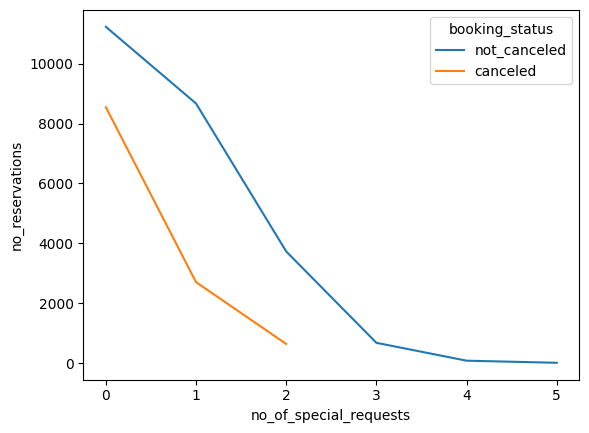

In [27]:
cancelations_by_month = data.groupby(['no_of_special_requests','booking_status']).count().reset_index()[['no_of_special_requests','booking_status','arrival_month']].rename(columns={'arrival_month':'no_reservations'})

cancelations_by_month['booking_status'] = cancelations_by_month['booking_status'].replace({0:'not_canceled',1:'canceled'})
sns.lineplot(data=cancelations_by_month, x="no_of_special_requests", y="no_reservations", hue="booking_status");

End of the notebook